*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/4_head_modifiers.ipynb)*

# Time Adverbial Distribution and Collocations
## Head Modifiers
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Wed 17 Jun 2020 12:34:45 BST


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# see .py's for variables
from config import *
from get_hmod_sample import *
from matplotlib import gridspec

In [3]:
def heatmap(data, center=0, **kwargs):
    """Draw seaborne heatmap with custom settings"""
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(
        data,
        center=center,
        cmap=cmap,
        square=True,
        linewidth=.5,
        **kwargs
    )

In [4]:
modifiers = [
    'plural', 'suffix', 'definite', 'demonstrative', 'cardinal', 
    'ordinal', 'genitive', 'preposition', 'qualitative', 'ø'
]

## Modifier x Genre DP

In [5]:
modXgenre = pd.pivot_table(
    head_mod_df,
    index='genre',
    values=modifiers,
    aggfunc='sum',
)
modXgenre = modXgenre.T

modXgenre

genre,instruction,list,poetry,prophetic,prose
cardinal,288.0,30.0,36.0,131.0,750.0
definite,1697.0,265.0,1134.0,2305.0,6917.0
demonstrative,75.0,10.0,10.0,366.0,844.0
genitive,1420.0,627.0,2278.0,2882.0,5516.0
ordinal,85.0,14.0,3.0,21.0,112.0
plural,1380.0,824.0,3289.0,3859.0,5938.0
preposition,3476.0,940.0,4929.0,6786.0,15162.0
qualitative,227.0,57.0,457.0,613.0,1190.0
suffix,1245.0,238.0,3968.0,3645.0,4640.0
ø,1988.0,981.0,4787.0,6276.0,13246.0


In [6]:
# expected proportional representation of total number 
# of phrases for any given genre; retrieved by dividing 
# a genre's total phrases by the marginal total of all genres' n-phrases
exp_prop = modXgenre.sum() / modXgenre.sum().sum()

# observed proportional representation for any given genre
# of a given modifiers's total occurrences
obv_prop = modXgenre.div(modXgenre.sum(1), 0)

# calculate the deviation of proportion of the observed
# proportional representation from the expected proportion
genre_dev_prop = obv_prop.sub(exp_prop, 1)

# calculate DP score following Gries 2008 by summing absolute
# value of all deviations per function and dividing by 2
# the resulting score ranges from 0 to 1 where 0 is the 
# hypothetical perfectly distributed function and 1 is the 
# hypothetical worst distributed function
genre_DP = abs(genre_dev_prop).sum(1) / 2
genre_DP = genre_DP.sort_values()

In [7]:
genre_DP

qualitative      0.022880
genitive         0.028314
ø                0.029461
preposition      0.034409
plural           0.082574
definite         0.138114
suffix           0.149217
demonstrative    0.238825
cardinal         0.279298
ordinal          0.302893
dtype: float64

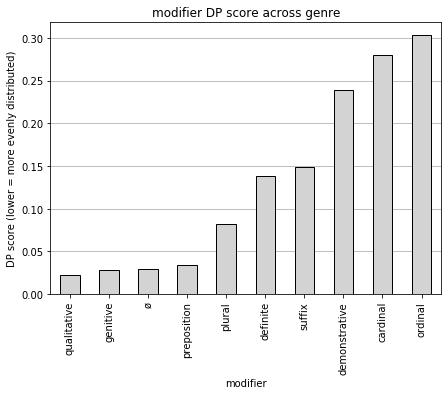

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))
genre_DP.plot(kind='bar', ax=ax, color='lightgrey', edgecolor='black')
ax.set_xlabel('modifier')
ax.set_ylabel('DP score (lower = more evenly distributed)')
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_title('modifier DP score across genre')
plt.show()

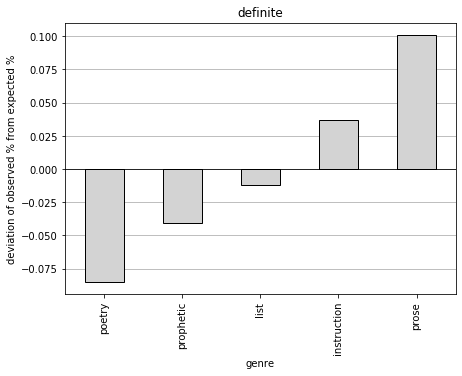

In [9]:
fig, ax = plt.subplots(figsize=(7, 5))
genre_dev_prop.loc['definite'].sort_values().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('definite')
savefig('devProp_modi_genre_Time')
plt.show()

In [10]:
genre_dev_prop.loc['definite'].sort_values()

genre
poetry        -0.085047
prophetic     -0.040789
list          -0.012279
instruction    0.037043
prose          0.101072
Name: definite, dtype: float64

## Function x Modifier Associations

In [11]:
#head_mod_df[~head_mod_df['cardinal'] & ~head_mod_df['preposition'] & (head_mod_df.function=='Time')]

In [12]:
functs_df = functs_df * 1

In [13]:
functXcomp = pd.pivot_table(
    head_mod_df,
    index='function',
    values=modifiers,
    aggfunc='sum'
)

functXcomp

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
function,,,,,,,,,,
Adju,101.0,1279.0,78.0,1552.0,11.0,1394.0,6457.0,311.0,1452.0,1974.0
Cmpl,121.0,3915.0,227.0,3556.0,9.0,3258.0,15887.0,480.0,3734.0,5436.0
Loca,22.0,589.0,32.0,508.0,2.0,244.0,1646.0,71.0,196.0,782.0
Objc,337.0,1992.0,289.0,2911.0,26.0,4137.0,5234.0,640.0,4393.0,5322.0
Subj,278.0,3212.0,186.0,3787.0,25.0,5690.0,94.0,831.0,3859.0,12616.0
Time,376.0,1331.0,493.0,409.0,162.0,567.0,1975.0,211.0,102.0,1148.0


In [14]:
#functXcomp.to_clipboard()

In [15]:
functXcomp_dp = mystats.apply_deltaP(functXcomp, 0, 1)
functXcomp_f, oddsratios = mystats.apply_fishers(functXcomp, 0, 1, logtransform=False)

In [16]:
functXcomp_dp # ΔP scores 

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
function,,,,,,,,,,
Adju,-0.004059,-0.019265,-0.006533,-0.001855,-0.001414,-0.039038,0.201674,-0.000318,-0.019470,-0.109720
Cmpl,-0.010393,0.003585,-0.007056,-0.015611,-0.002533,-0.058973,0.244382,-0.012270,-0.021017,-0.120116
Loca,-0.005277,0.040931,-0.003360,0.016869,-0.001558,-0.072510,0.141879,-0.004368,-0.071014,-0.041592
Objc,0.003640,-0.032626,0.000469,0.009272,-0.001227,0.043297,-0.074151,0.004771,0.072953,-0.026398
Subj,-0.001861,0.000830,-0.006723,0.021580,-0.001586,0.076215,-0.353980,0.007572,0.013166,0.244786
Time,0.047780,0.097668,0.065475,-0.050376,0.023258,-0.048719,0.027865,0.010165,-0.107569,-0.065546


In [17]:
oddsratios

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
Adju,0.627496,0.802333,0.446755,0.980796,0.346905,0.679041,2.503923,0.984945,0.818119,0.481862
Cmpl,0.238708,1.038857,0.464334,0.846600,0.088217,0.562429,3.278664,0.510054,0.809695,0.474758
Loca,0.502003,1.464175,0.697113,1.179532,0.238480,0.416461,1.911602,0.795342,0.372759,0.779033
Objc,1.380785,0.682134,1.043237,1.098967,0.455477,1.430167,0.667439,1.238245,1.875837,0.858865
Subj,0.828542,1.008901,0.471773,1.240845,0.339648,1.852309,0.005553,1.397040,1.133294,3.483451
Time,7.547801,2.230031,10.668837,0.515924,37.291724,0.598484,1.149159,1.500009,0.109381,0.664190


In [18]:
functXcomp_f.round(5) # p-values for statistical significance (Fisher's exact)

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
Adju,-0.00000,-0.00000,-0.00000,-0.51223,-0.00009,-0.0,0.0,-0.83136,-0.0,-0.0
Cmpl,-0.00000,0.06258,-0.00000,-0.00000,-0.00000,-0.0,0.0,-0.00000,-0.0,-0.0
Loca,-0.00055,0.00000,-0.04736,0.00078,-0.01959,-0.0,0.0,-0.06229,-0.0,-0.0
Objc,0.00000,-0.00000,0.51945,0.00003,-0.00004,0.0,-0.0,0.00001,0.0,-0.0
Subj,-0.00553,0.68772,-0.00000,0.00000,-0.00000,0.0,-0.0,0.00000,0.0,0.0
Time,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.0,0.0,0.00000,-0.0,-0.0


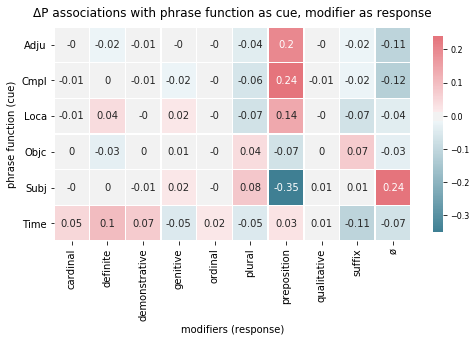

In [32]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# plot scores
heatmap(functXcomp_dp.round(2), ax=ax1, annot=True, cbar_kws={'shrink': 0.6})
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
ax1.set_title('ΔP associations with phrase function as cue, modifier as response', pad=10)
ax1.set_xlabel('modifiers (response)')
ax1.set_ylabel('phrase function (cue)')

# ajust color bar settings
cbar = ax1.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

savefig('ΔP_funct_modifiers')

### PCA clustering of functions based on components

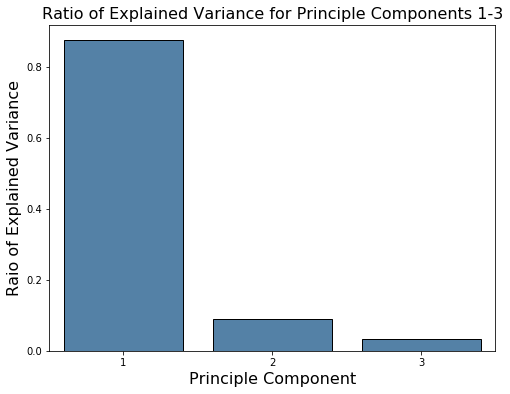

In [20]:
fc_pca, fc_loadings = my_pca.apply_pca(
    functXcomp_dp, 
    sample_axis=0, 
    feature_axis=1,
    components=3,
)

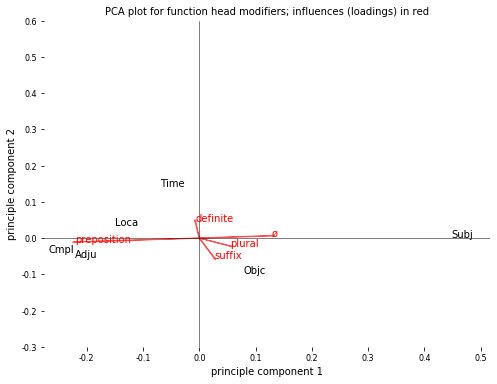

In [21]:
fig, ax2 = plt.subplots(figsize=(8, 6))

# plot PCA
x, y = fc_pca['PC1'], fc_pca['PC2']
ax2.scatter(x, y, s=9, color='')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.set_xlabel('principle component 1')
ax2.set_ylabel('principle component 2')
ax2.set_title('PCA plot for function head modifiers; influences (loadings) in red', size=10)
#ax2.axis('equal')
ax2.set_yticks(ax2.get_xticks())

# Hide the spines but keep the ticks
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_yticklabels(ax2.get_yticks().round(1), size=8)
ax2.set_xticklabels(ax2.get_xticks().round(1), size=8)

# plot function labels
xoff = -0.03
yoff = -0.002
for i, function in enumerate(fc_pca.index):
    ax2.text(x[i]+xoff, y[i]+yoff, function)
    
# plot loadings arrows + labels (scree plot)
loads = fc_loadings.T[[1, 2]].loc[fc_loadings.T[[1, 2]].abs().sum(1).sort_values(ascending=False).index][:5]
for l in loads.index:
    x,y = loads.loc[l]
    ax2.arrow(0, 0, x, y, color='#ff4d4d')
    ax2.text(x, y, l, color='red', size=10)

savefig('PCA_ΔP_funct_modis')

## Digging into similarities

In [22]:
modi_freqs = pd.pivot_table(
    head_mod_df,
    index='function',
    columns=modifiers,
    aggfunc='size',
    fill_value=0,
)
modi_freqs

plural        False                                                         \
suffix        False                                                          
definite      False                                                          
demonstrative False                                                          
cardinal      False                                                          
ordinal       False                                                          
genitive      False                                True                      
preposition   False              True              False       True          
qualitative   False        True  False       True  False True  False True    
ø             False  True  False False True  False False False False False   
function                                                                     
Adju             28    186     4   124  1788    59    36     1  1165    21   
Cmpl              5    978     0   137  4458    99   205     0  2445    63   
Loca              2    387     0    19   395     9    59     0   354    23   
Objc            318   4428    79    11   894    27  1160    44   827    37   
Subj            308  12596   170     0    20     1  2319   103     8     1   
Time             12    720     1    24   428    19    15     0   298     0   

plural         ... True                                                         
suffix         ... False True                                                   
definite       ... True  False                                     True         
demonstrative  ... True  False                               True  False        
cardinal       ... True  False                   True        False False        
ordinal        ... False False                   False       False False        
genitive       ... False False                   False       False False        
preposition    ... True  False       True        False True  False True         
qualitative    ... False False True  False True  False False False False True   
ø              ... False False False False False False False False False False  
function       ...                                                              
Adju           ...     0    12     1   379    62     0    10     0     0     0  
Cmpl           ...     6    14     0  1028    73     0    13     0     1     0  
Loca           ...     0     5     0    33     5     0    10     0     0     0  
Objc           ...     2   825    53   415    42     4     5     1     0     1  
Subj           ...     0  1006    99     4     0     7     0     0     0     0  
Time           ...     0     0    16    40     3     0     0     0     0     0  

[6 rows x 82 columns]

In [23]:
def_df = modi_freqs.groupby(axis=1, level=('definite')).sum().loc[['Time', 'Loca']]
prep_df = modi_freqs.groupby(axis=1, level='preposition').sum().loc[['Time', 'Loca']]
multi_index = pd.MultiIndex.from_product([('definite', 'preposition'), (False, True)])
time_loca = pd.concat([def_df, prep_df], 1)
time_loca.columns = multi_index

#time_loca.to_clipboard()

time_loca

definite       preposition      
            False True        False True 
function                                 
Time         2159  1331        1515  1975
Loca         1548   589         491  1646

In [24]:
time_loca_prop = time_loca.copy()

for modi in ('definite', 'preposition'):
    time_loca_prop[(modi,)] = time_loca_prop[(modi,)].div(time_loca_prop[(modi,)].sum(1), 0)

#time_loca_prop.round(2).to_clipboard()
    
time_loca_prop

definite           preposition          
             False     True        False     True 
function                                          
Time      0.618625  0.381375    0.434097  0.565903
Loca      0.724380  0.275620    0.229761  0.770239

### Similarities between Time and Loca

In [25]:
head_mod_df

,function,ref,book,ph_type,head,text,token,clause,sentence,classi,...,demon_dist,ordinal,ord_str,cl_kind,verb,tense,verb_lex,book_sbl,lang,genre
node,,,,,,,,,,,,,,,,,,,,,
651542,Time,Gen 1:1,Genesis,prep_ph,ראשׁית,בְּרֵאשִׁ֖ית,ב.ראשׁית,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,single.prep.bare.øanchor,...,NaN,False,NaN,VC,True,qtl,ברא,Gen,Hebrew,prose
651544,Subj,Gen 1:1,Genesis,cont,אלהים,אֱלֹהִ֑ים,אלהים,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,single.øanchor,...,NaN,False,NaN,VC,True,qtl,ברא,Gen,Hebrew,prose
651547,Subj,Gen 1:2,Genesis,defi_ph,ארץ,הָאָ֗רֶץ,ה.ארץ,וְהָאָ֗רֶץ הָיְתָ֥ה תֹ֨הוּ֙ וָבֹ֔הוּ,וְהָאָ֗רֶץ הָיְתָ֥ה תֹ֨הוּ֙ וָבֹ֔הוּ,single.definite,...,NaN,False,NaN,VC,True,qtl,היה,Gen,Hebrew,prose
651551,Subj,Gen 1:2,Genesis,cont,חשׁך,חֹ֖שֶׁךְ,חשׁך,וְחֹ֖שֶׁךְ עַל־פְּנֵ֣י תְהֹ֑ום,וְחֹ֖שֶׁךְ עַל־פְּנֵ֣י תְהֹ֑ום,single.bare.øanchor,...,NaN,False,NaN,NC,False,NaN,NaN,Gen,Hebrew,prose
651554,Subj,Gen 1:2,Genesis,geni_ph,רוח,ר֣וּחַ אֱלֹהִ֔ים,רוח.אלהים,וְר֣וּחַ אֱלֹהִ֔ים מְרַחֶ֖פֶת עַל־פְּנֵ֥י הַמּ...,וְר֣וּחַ אֱלֹהִ֔ים מְרַחֶ֖פֶת עַל־פְּנֵ֥י הַמּ...,single.genitive,...,NaN,False,NaN,VC,True,ptcp,רחף,Gen,Hebrew,prose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904722,Cmpl,2 Chr 36:22,2_Chronicles,prep_ph,מלכות,בְּכָל־מַלְכוּתֹ֔ו,ב.כל.מלכות,וַיַּֽעֲבֶר־קֹול֙ בְּכָל־מַלְכוּתֹ֔ו,וַיַּֽעֲבֶר־קֹול֙ בְּכָל־מַלְכוּתֹ֔ו וְגַם־בְּ...,single.prep.quantified.qualitative,...,NaN,False,NaN,VC,True,wyqtl,עבר,2 Chr,Hebrew,prose
904724,Adju,2 Chr 36:22,2_Chronicles,advb,מכתב,גַם־בְּמִכְתָּ֖ב,גם.ב.מכתב,וְגַם־בְּמִכְתָּ֖ב,וַיַּֽעֲבֶר־קֹול֙ בְּכָל־מַלְכוּתֹ֔ו וְגַם־בְּ...,single.prep.bare.øanchor,...,NaN,False,NaN,WP,False,NaN,NaN,2 Chr,Hebrew,prose
904729,Objc,2 Chr 36:23,2_Chronicles,numb_ph,ממלכה,כָּל־מַמְלְכֹ֤ות הָאָ֨רֶץ֙,כל.ממלכה.ה.ארץ,כָּל־מַמְלְכֹ֤ות הָאָ֨רֶץ֙ נָ֣תַן לִ֗י יְהוָה֙...,כָּל־מַמְלְכֹ֤ות הָאָ֨רֶץ֙ נָ֣תַן לִ֗י יְהוָה֙...,single.genitive.quantified.qualitative,...,NaN,False,NaN,VC,True,qtl,נתן,2 Chr,Hebrew,prose


### Modifier Tendencies in poetry 

In [38]:
genres = head_mod_df.genre.value_counts() # get sorted list of genres for iteration
genre_dfs = {}
genre_pivots = {}
genre_deltPs = {}
min_score = 0 # for configuring the heatmaps 
max_score = 0

for genre in genres.index:
    genre_df = head_mod_df[head_mod_df.genre == genre]
    genre_pivot = pd.pivot_table(
        genre_df,
        index='function',
        values=modifiers,
        aggfunc='sum',
        fill_value=0,
    )
    genre_deltP = mystats.apply_deltaP(genre_pivot, 0, 1)
    
    if genre not in ['list','instruction']:
        g_min = genre_deltP.min().min()
        g_max = genre_deltP.max().max()
        min_score = g_min if g_min < min_score else min_score
        max_score = g_max if g_max > max_score else max_score
    
    genre_dfs[genre] = genre_df
    genre_pivots[genre] = genre_pivot
    genre_deltPs[genre] = genre_deltP

In [40]:
max_score

0.3008992499401755

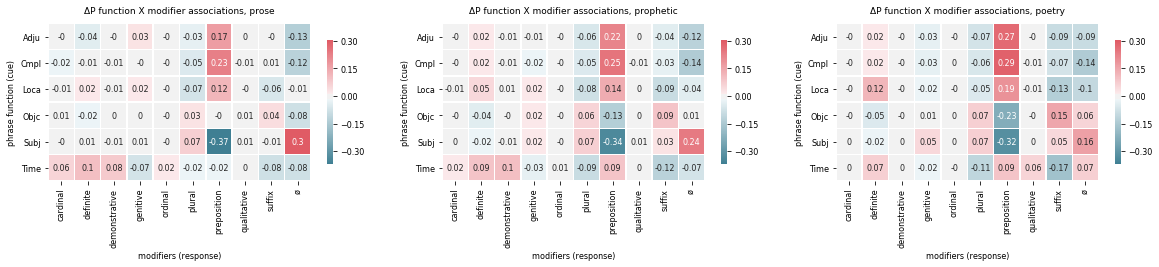

In [42]:
fig = plt.figure(figsize=(20, 10))

select_genres = ['prose', 'prophetic', 'poetry',]

for i, genre in enumerate(select_genres):
    deltp = genre_deltPs[genre]
    ax = fig.add_subplot(2, 3, i+1)    
    heatmap(
        deltp.round(2), 
        ax=ax, 
        annot=True, 
        cbar_kws={'shrink': 0.5}, 
        annot_kws={'size': 8},
        vmin=min_score,
        vmax=max_score,
    )
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=8)
    ax.set_xticklabels(ax.get_xticklabels(), size=8)
    ax.set_title(f'ΔP function X modifier associations, {genre}', pad=10, size=9)
    ax.set_xlabel('modifiers (response)', size=8)
    ax.set_ylabel('phrase function (cue)', size=8)
    # ajust color bar sizes
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)
    i += 1
    
savefig('ΔP_modifiers_genre')

In [34]:
sns.heatmap

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

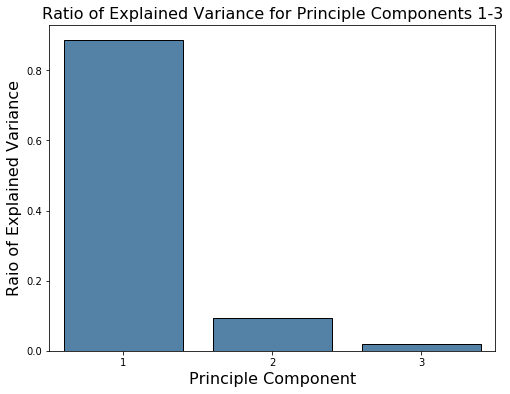

In [43]:
poet_pca, poet_loadings = my_pca.apply_pca(
    genre_deltPs['poetry'], 
    sample_axis=0, 
    feature_axis=1,
    components=3,
)

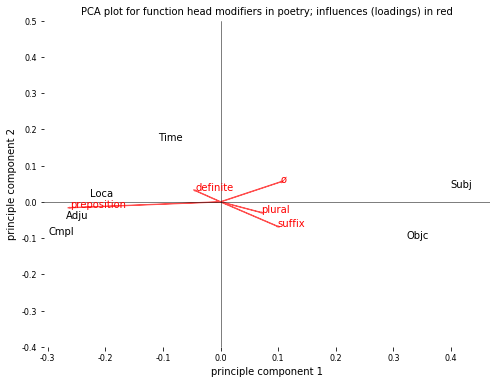

In [44]:
fig, ax2 = plt.subplots(figsize=(8, 6))

# plot PCA
x, y = poet_pca['PC1'], poet_pca['PC2']
ax2.scatter(x, y, s=9, color='')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.set_xlabel('principle component 1')
ax2.set_ylabel('principle component 2')
ax2.set_title('PCA plot for function head modifiers in poetry; influences (loadings) in red', size=10)
#ax2.axis('equal')
ax2.set_yticks(ax2.get_xticks())

# Hide the spines but keep the ticks
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_yticklabels(ax2.get_yticks().round(1), size=8)
ax2.set_xticklabels(ax2.get_xticks().round(1), size=8)

# plot function labels
xoff = -0.03
yoff = -0.002
for i, function in enumerate(poet_pca.index):
    ax2.text(x[i]+xoff, y[i]+yoff, function)
    
# plot loadings arrows + labels (scree plot)
loads = poet_loadings.T[[1, 2]].loc[poet_loadings.T[[1, 2]].abs().sum(1).sort_values(ascending=False).index][:5]
for l in loads.index:
    x,y = loads.loc[l]
    ax2.arrow(0, 0, x, y, color='#ff4d4d')
    ax2.text(x, y, l, color='red', size=10)

savefig('PCA_ΔP_funct_modis_poetry')

## Head Word x Modifier Associations (Time)

In [27]:
times = head_mod_df[head_mod_df.function == 'Time']

headXmod = pd.pivot_table(
    times,
    index='head',
    values=modifiers,
    aggfunc='sum',
    fill_value=0,
).T

In [19]:
head_delt_mod = mystats.apply_deltaP(headXmod, 0, 1).fillna(0)
head_delt_mod = head_delt_mod[head_delt_mod.abs().sum().sort_values(ascending=False).index]
head_delt_mod.iloc[:, :20]

head,יום,שׁנה,עתה,עולם,עת,בקר,אז,חדשׁ,לילה,ערב,מות,כן,תמיד,מחר,נצח,מתי,נעורים,חיים,דבר,מחרת
cardinal,-0.035698,0.437461,-0.056580,-0.054392,-0.058925,-0.037043,-0.021100,0.043982,-0.029535,-0.026415,-0.008284,-0.016255,-0.008440,-0.007815,-0.008440,-0.007815,-0.002813,-0.002813,-0.007971,-0.008128
definite,0.184315,-0.042301,-0.066507,-0.061130,0.005540,0.050897,-0.024802,-0.000193,0.034401,0.044689,-0.009737,-0.019107,-0.009921,-0.009186,-0.009921,-0.009186,-0.003307,-0.003307,0.001851,-0.008619
demonstrative,0.333953,-0.055376,-0.053259,-0.055405,0.082172,-0.037733,-0.021493,-0.022531,0.005742,-0.026907,-0.008438,-0.016558,-0.008597,-0.007961,-0.008597,-0.007961,-0.002866,-0.002866,0.018132,-0.008279
genitive,0.215724,-0.030725,-0.056874,-0.052072,0.065670,-0.037235,-0.018608,-0.008337,-0.035350,-0.026551,0.033307,-0.016339,-0.008484,-0.007855,-0.005882,-0.007855,-0.002828,-0.002828,-0.008013,0.004841
ordinal,0.204325,0.090951,-0.054749,-0.052632,-0.057018,-0.035844,-0.020417,0.145191,-0.034029,-0.019236,-0.008016,-0.015729,-0.008167,-0.007562,-0.008167,-0.007562,-0.002722,-0.002722,-0.007713,-0.007864
plural,0.227281,0.086300,-0.058321,-0.046442,-0.049189,-0.032408,-0.021750,0.018967,-0.026626,-0.027227,-0.008539,-0.016755,-0.008700,-0.008055,-0.008700,-0.008055,0.008649,0.008649,0.012956,-0.008378
preposition,-0.077027,-0.030340,-0.071144,0.048270,0.030792,0.032806,-0.021699,-0.002339,-0.009005,0.024820,0.008253,0.015494,-0.011252,-0.006845,0.007330,0.007449,0.000537,0.000537,-0.000621,0.007747
qualitative,0.349341,-0.048085,-0.055158,-0.053025,-0.003634,-0.036112,-0.020570,-0.020859,0.058659,-0.025750,-0.008076,-0.015846,-0.008228,-0.007618,-0.008228,-0.007618,-0.002743,-0.002743,-0.007771,-0.007923
suffix,-0.066265,-0.046639,-0.054257,-0.052158,0.043033,-0.035522,-0.020234,0.004532,-0.033723,-0.025330,0.091594,-0.015588,-0.008094,-0.007494,-0.008094,-0.007494,0.057025,0.057025,0.012264,-0.007794
ø,-0.553127,-0.078919,0.306940,0.116445,-0.062815,-0.023247,0.107108,-0.028990,0.008253,-0.026893,-0.009421,0.036053,0.047038,0.038310,0.018720,0.017333,-0.003199,-0.003199,-0.009065,0.011734


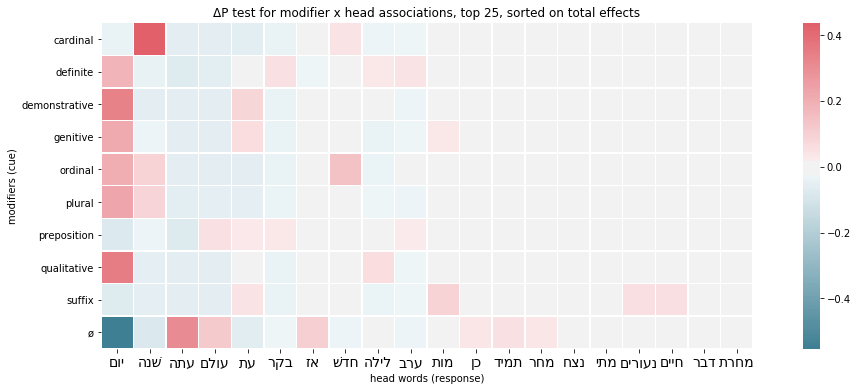

In [20]:
fig, ax = plt.subplots(figsize=(18, 6))

heatmap(head_delt_mod.iloc[:,:20], ax=ax,)
x_tick_labels = [get_display(hw._text) for hw in ax.get_xticklabels()] # fix Hebrew labels
ax.set_xticklabels(x_tick_labels, size=14)
ax.set_ylabel('modifiers (cue)')
ax.set_xlabel('head words (response)')
ax.set_title('ΔP test for modifier x head associations, top 25, sorted on total effects')

savefig('ΔP_mod_head')

plt.show()

In [21]:
head_counts = times['head'].value_counts(ascending=False)
head_prop = head_counts / head_counts.sum()

head_prop

יום        0.387106
עתה        0.102006
שׁנה       0.074785
עולם       0.051003
עת         0.044413
             ...   
אשׁמורה    0.000287
שׁמשׁ      0.000287
רוח        0.000287
מעים       0.000287
תבואה      0.000287
Name: head, Length: 113, dtype: float64

In [22]:
head_counts

יום        1351
עתה         356
שׁנה        261
עולם        178
עת          155
           ... 
אשׁמורה       1
שׁמשׁ         1
רוח           1
מעים          1
תבואה         1
Name: head, Length: 113, dtype: int64

In [23]:
head_counts.sum()

3490

## Modifier x Modifier Association

In [25]:
comps_data = {}
dp_comps = {}

functions = [
    'Time',
    'Loca',
    'Adju',
    'Cmpl',
    'Objc',
    'Subj',
]

for funct in functions:

    funct_data = functs_df[functs_df.function == funct]
    comps = funct_data[modifiers] * 1 # mult by 1 turns T/F into 1/0
    comps = comps.T.dot(comps) # dot product for pairwise
    np.fill_diagonal(comps.values, 0) # ignore diagonals
    comps_data[funct] = comps
    
    deltaP_comps = mystats.apply_deltaP(comps, 0, 1)
    np.fill_diagonal(deltaP_comps.values, 0)
    dp_comps[funct] = deltaP_comps

In [26]:
dp_comps.keys()

dict_keys(['Time', 'Loca', 'Adju', 'Cmpl', 'Objc', 'Subj'])

In [27]:
dp_comps['Time']

,plural,suffix,definite,demonstrative,cardinal,ordinal,genitive,preposition,qualitative,ø
plural,0.000000,0.080292,-0.096085,-0.068650,0.211674,-0.041237,0.046081,-0.055029,0.104066,-0.054474
suffix,0.302470,0.000000,-0.216816,-0.116363,-0.035188,-0.037626,-0.057136,0.191363,0.046987,-0.049704
definite,-0.057600,-0.034503,0.000000,0.189153,-0.036591,0.063578,-0.070437,0.255005,0.019955,-0.061274
demonstrative,-0.068231,-0.030701,0.313608,0.000000,-0.038599,-0.041274,-0.062675,0.149825,-0.039787,-0.054522
cardinal,0.638836,-0.028190,-0.184215,-0.117207,0.000000,-0.037899,-0.040464,-0.106752,-0.038601,-0.050064
ordinal,-0.116674,-0.028260,0.300070,-0.117495,-0.035530,0.000000,-0.057692,0.182458,-0.038696,-0.050188
genitive,0.087586,-0.028828,-0.223325,-0.119856,-0.025483,-0.038756,0.000000,0.397034,0.061677,-0.051196
preposition,-0.025058,0.023131,0.193701,0.068642,-0.016107,0.029365,0.095120,0.000000,-0.038151,0.149129
qualitative,0.289290,0.034673,0.092537,-0.111283,-0.035555,-0.038019,0.090206,-0.232903,0.000000,-0.050223
ø,-0.118115,-0.028609,-0.221629,-0.118946,-0.035969,-0.038462,-0.058405,0.710114,-0.039174,0.000000


In [28]:
max_score = max(table.max().max() for table in dp_comps.values())
min_score = min(table.min().min() for table in dp_comps.values())

In [29]:
min_score

-0.39742246437552387

In [30]:
max_score

0.9872170997485331

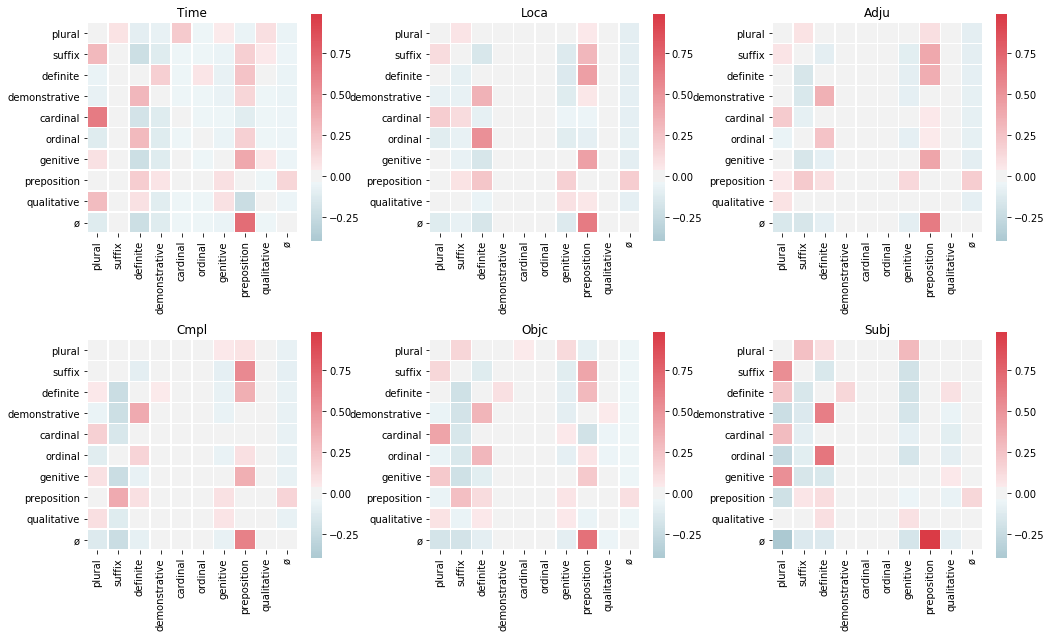

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(17, 10))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for i, funct in enumerate(functions):
    heatmap(dp_comps[funct], ax=axs[i], vmin=min_score, vmax=max_score)
    axs[i].set_title(funct)

savefig('comp_comp_ΔP_function')
plt.show()

Unique to Time:

* plural is more predictive of cardinal, vice versa


### Build a Gephi network

We will export these scores in the form of edges in a Gephi network.

In [ ]:
gephi_dir = Path('../../gephi/adverbial_components/')

for funct in functions:

    gephi_nodes = pd.DataFrame(dp_comps[funct].index)
    gephi_nodes.columns=['Label']
    gephi_nodes.index.name = 'ID'

    edge_data = []
    for i1, comp1 in enumerate(dp_comps[funct].index):
        for i2, comp2 in enumerate(dp_comps[funct].columns):
            weight = round(dp_comps[funct].loc[comp1][comp2], 2)
            if weight and weight > 0:
                edge_data.append((i1, i2, weight))

    gephi_edges = pd.DataFrame(edge_data, columns=['Source', 'Target', 'Weight'])

    gephi_nodes.to_csv(gephi_dir.joinpath(f'{funct}_comp_nodes.csv'))
    gephi_edges.to_csv(gephi_dir.joinpath(f'{funct}_comp_edges.csv'), index=False)

**Gephi graph with ΔP as edge weight and Force Atlas 2**

<img src="../../gephi/advb_article/Time_comp_graph.svg" height="40%" width="40%">

In the graph we can make out 6 sub-networks:

* plural, cardinal
* suffix, plural, preposition
* genitive, plural, preposition
* definite, demonstrative, preposition
* definite, ordinal, preposition
* bare, preposition

## ΔP with Preposition Lexemes

In [54]:
prep_comps = head_mod_df[['leading_prep', 'plural', 'suffix', 'demonstrative', 'cardinal', 'ordinal', 'genitive', 'ø']] * 1
raw_prepXcomp = prep_comps.groupby('leading_prep').sum()
prepXcomp = raw_prepXcomp[raw_prepXcomp.sum(1) > 20]
prepXcomp

,plural,suffix,demonstrative,cardinal,ordinal,genitive,ø
leading_prep,,,,,,,
אחר,63,36,15,2,0,21,101
אל,398,376,56,17,1,520,993
את,1244,1582,262,54,12,1240,916
ב,1474,2075,440,83,163,2066,1392
בין,30,14,2,2,0,3,5
בעד,5,8,3,0,0,3,6
דרך,0,3,0,0,0,15,6
כ,217,139,61,31,5,344,157
כמו,4,0,0,0,0,4,31


In [55]:
dp_prepXcomp = mystats.apply_deltaP(prepXcomp, 0, 1)

dp_prepXcomp

,plural,suffix,demonstrative,cardinal,ordinal,genitive,ø
leading_prep,,,,,,,
אחר,0.057072,-0.084469,0.027426,-0.003040,-0.006681,-0.145404,0.155097
אל,-0.042971,-0.082404,-0.013158,-0.004587,-0.006745,-0.013284,0.163148
את,0.031944,0.076729,0.016497,-0.001525,-0.005329,0.001291,-0.119608
ב,-0.022331,0.046956,0.028940,-0.000853,0.019716,0.048870,-0.121297
בין,0.328244,0.014982,-0.000107,0.024341,-0.006640,-0.179233,-0.181587
בעד,-0.008102,0.085026,0.084250,-0.011429,-0.006633,-0.112559,-0.030553
דרך,-0.208265,-0.110136,-0.035850,-0.011429,-0.006633,0.392857,-0.020544
כ,0.020017,-0.092338,0.029062,0.021782,-0.001433,0.132417,-0.109508
כמו,-0.105671,-0.235358,-0.035869,-0.011434,-0.006636,-0.130072,0.525040


In [56]:
# fig,ax = plt.subplots(figsize=(8, 5))
# sns.heatmap(dp_prepXcomp, ax=ax, robust=True, center=0)
# ax.set_yticklabels((get_display(prep) for prep in dp_prepXcomp.index), rotation=0, size=12)
# plt.show()